# Question: 2
Train an SVM regressor on : Bengaluru housing dataset

    Must include in details:

  - EDA

  - Feature engineering 

# Profile of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [6]:
df.duplicated().sum()

529

In [7]:
df = df.drop_duplicates()
df.shape

(12791, 9)

In [8]:
# Display summary statistics of numerical columns
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [10]:
# Check for missing values
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64


In [11]:
# Handle missing values
df = df.dropna()

In [12]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

Super built-up  Area    5672
Built-up  Area          1152
Plot  Area               268
Carpet  Area              52
Name: area_type, dtype: int64
********************
Ready To Move    5456
18-May            169
18-Dec            165
19-Dec            148
18-Apr            146
                 ... 
20-May              1
15-Jun              1
20-Mar              1
16-Mar              1
14-Jul              1
Name: availability, Length: 74, dtype: int64
********************
Whitefield            382
Sarjapur  Road        297
Electronic City       229
Thanisandra           207
Kanakpura Road        195
                     ... 
Jaladarsini Layout      1
KSRTC Layout            1
Raghavendra Nagar       1
Bhuvaneswari Nagar      1
Abshot Layout           1
Name: location, Length: 634, dtype: int64
********************
2 BHK        3232
3 BHK        2869
1 BHK         339
4 BHK         332
4 Bedroom     192
3 Bedroom     120
5 Bedroom      16
2 Bedroom      16
1 RK           10
5 BHK         

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


# Visualize Data:

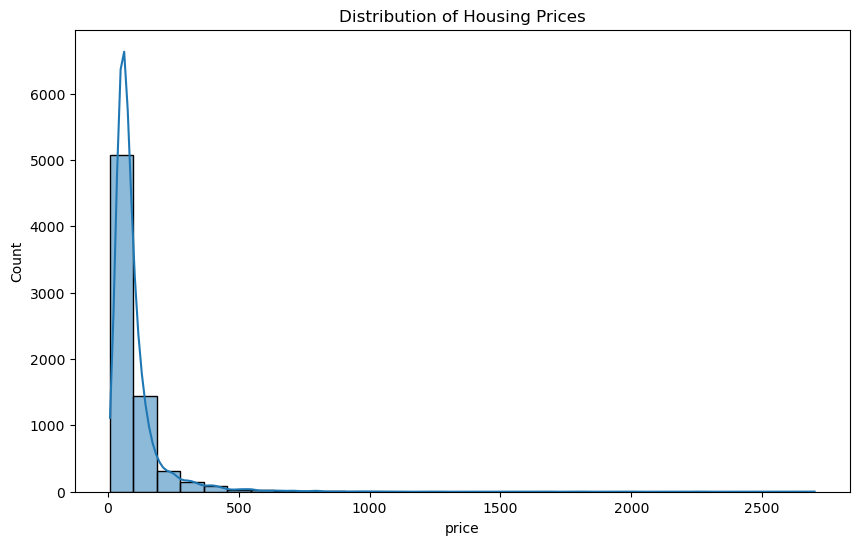

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

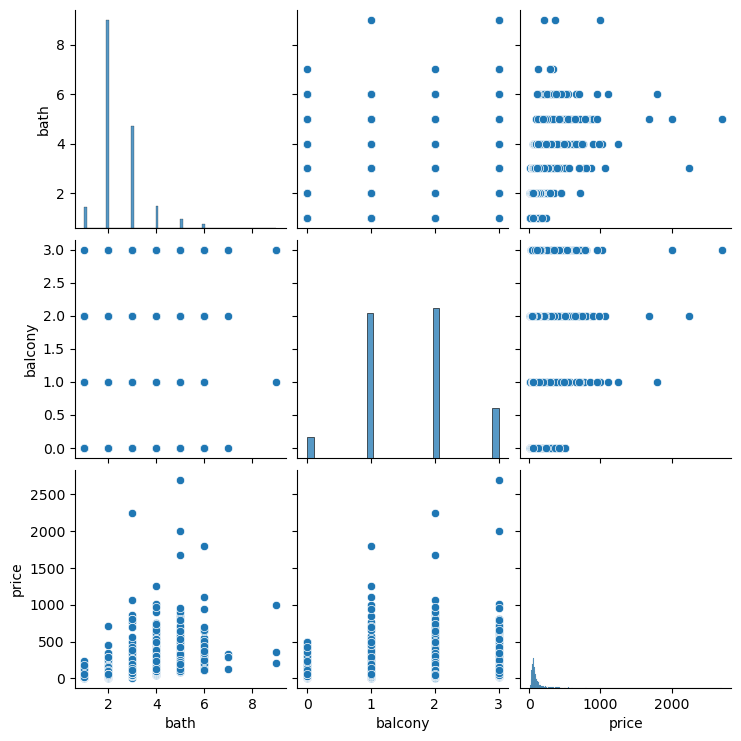

In [15]:
# Visualize relationships between features and target variable
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()


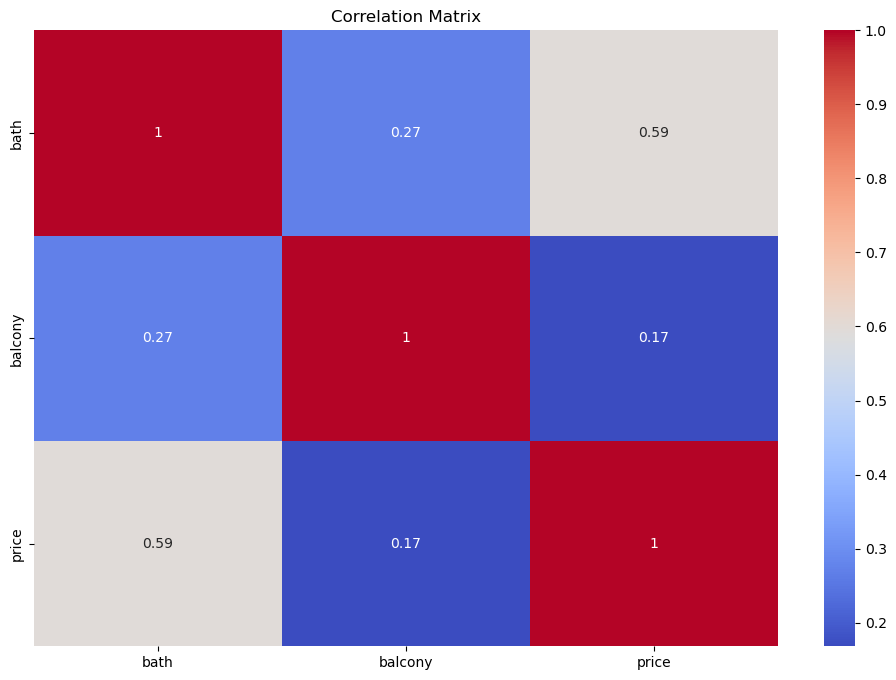

In [16]:
# Explore correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


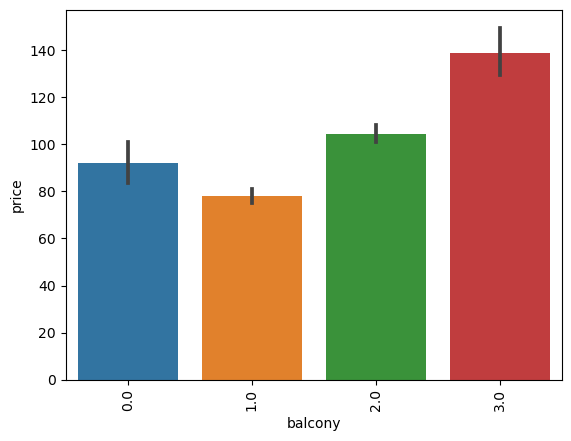

In [17]:
sns.barplot(x=df['balcony'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

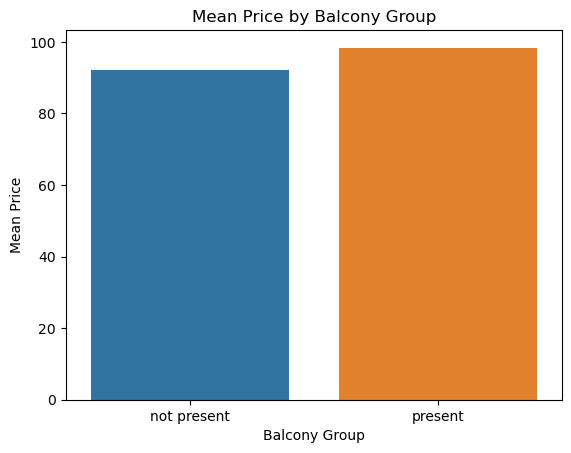

In [18]:
df['grouped_balcony'] = df['balcony'].apply(lambda x: 'present' if x in [1.0, 2.0, 3.0] else 'not present' if x==0.0 else None)
grouped_df = df.groupby('grouped_balcony')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_df['grouped_balcony'], y=grouped_df['price'])
plt.xlabel('Balcony Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by Balcony Group')
plt.show()

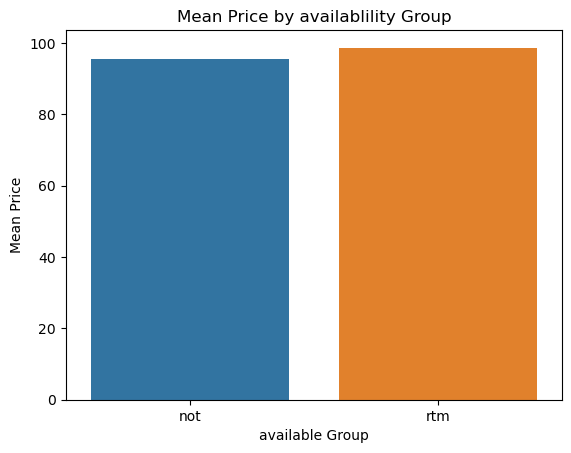

In [19]:
df['grouped_available'] = df['availability'].apply(lambda x: 'rtm' if x=='Ready To Move' else 'not')
grouped_df = df.groupby('grouped_available')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_df['grouped_available'], y=grouped_df['price'])
plt.xlabel('available Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by availablility Group')
plt.show()

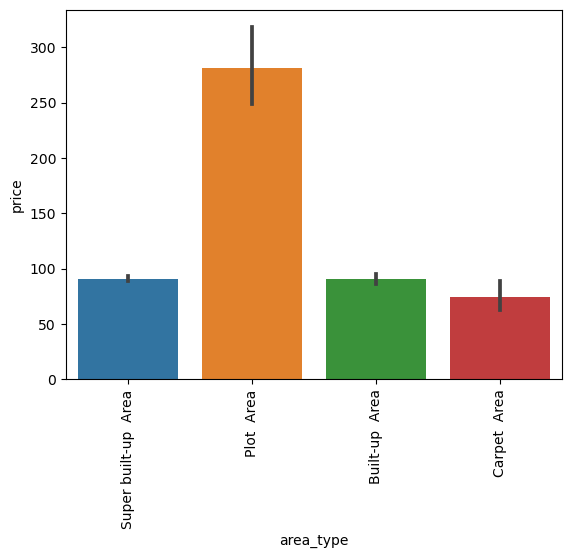

In [20]:
sns.barplot(x=df['area_type'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
df.drop(columns = ['balcony','society', 'grouped_balcony', 'grouped_available'], axis=1, inplace=True)

# Feature Engineering

In [22]:
df['total_sqft'].value_counts()

1200    168
1100    100
1000     75
1500     72
1300     68
       ... 
2550      1
1753      1
999       1
1974      1
4689      1
Name: total_sqft, Length: 1682, dtype: int64

In [23]:
# Feature Engineering:

# Convert 'total_sqft' to numerical format (handle ranges and other non-numeric values)
def convert_total_sqft(total_sqft):
    try:
        # Check if the value is a range
        if '-' in total_sqft:
            tokens = total_sqft.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        # If it's a single value, convert to float
        return float(total_sqft)
    except:
        # If conversion fails, return NaN
        return None

In [24]:
# Apply the conversion function to 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)

In [25]:
# Drop rows with missing values in 'total_sqft'
df = df.dropna(subset=['total_sqft'])


# Splitting the data

In [26]:
# Assume 'location', 'size', 'total_sqft', 'bath', 'balcony', etc., are features
X = df[['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath']]

# Target variable
y = df['price']


# Encoding

In [27]:
# Convert categorical features using one-hot encoding or label encoding
X = pd.get_dummies(X, columns=['area_type', 'availability', 'location', 'size'], drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Model Bulding and Evaluation

In [30]:
from sklearn.svm import SVR

In [31]:
model = SVR()    

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# Fit the SVR model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 45.21460493718527
Mean Squared Error: 14107.89615066365
R-squared: 0.03151640268370426
